**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import time,datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


**Exploratory Data Analysis**

In [2]:
uber_data = pd.read_csv('//content/Uber dataset.zip')

In [3]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
#Now lets rename the columns and remove '*' from columns' name.
uber_data = uber_data.rename(columns = {uber_data.columns[0]:'START_DATE',
                                        uber_data.columns[1]:'END_DATE',
                                        uber_data.columns[2]:'CATEGORY',
                                        uber_data.columns[3]:'START',
                                        uber_data.columns[4]:'STOP',
                                        uber_data.columns[5]: 'MILES',
                                        uber_data.columns[6]:'PURPOSE'})

In [5]:
print(uber_data.isnull().sum())
print(uber_data.isnull().sum().sum())

uber_data=uber_data.dropna()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507


In [6]:
uber_data[uber_data.START.str.contains('\?') == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
140,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.1,Meeting
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies


In [7]:
uber_data['START'] = uber_data['START'].replace({"\?":"a"}, regex = True)
uber_data["STOP"] = uber_data["STOP"].replace({"\?":"a"}, regex = True)

In [8]:
#make string as datetime to identify individual easily

uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format="%m/%d/%Y %H:%M")

uber_data['HOUR'] =  [x.hour for x in uber_data['START_DATE']]
uber_data['DAY'] =  [x.day for x in uber_data['START_DATE']]
uber_data['MONTH'] =  [x.month for x in uber_data['START_DATE']]
uber_data['WEEKDAY'] =  [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE']]
uber_data['DAY_OF_WEEK'] =  [x.dayofweek for x in uber_data['START_DATE']]

In [9]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


**Analysis**

<Axes: xlabel='CATEGORY', ylabel='count'>

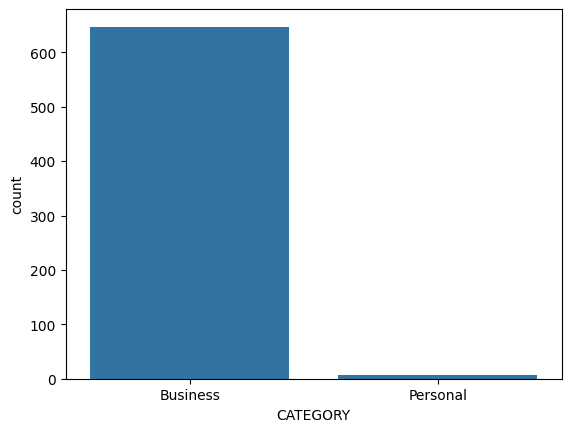

In [10]:
sns . countplot(x= 'CATEGORY' ,data=uber_data)

<Axes: xlabel='count', ylabel='PURPOSE'>

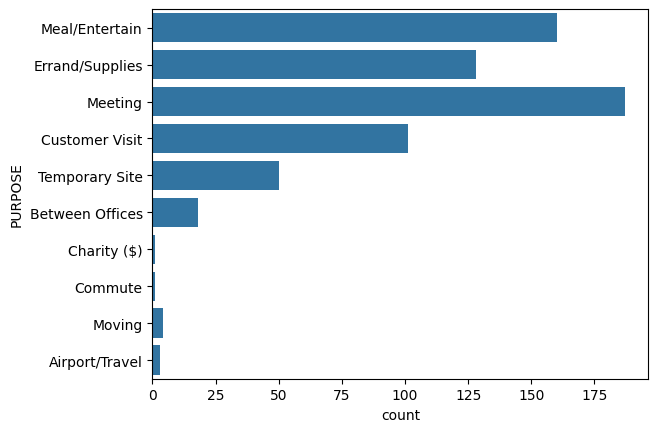

In [11]:
sns . countplot(y= 'PURPOSE' ,data=uber_data)

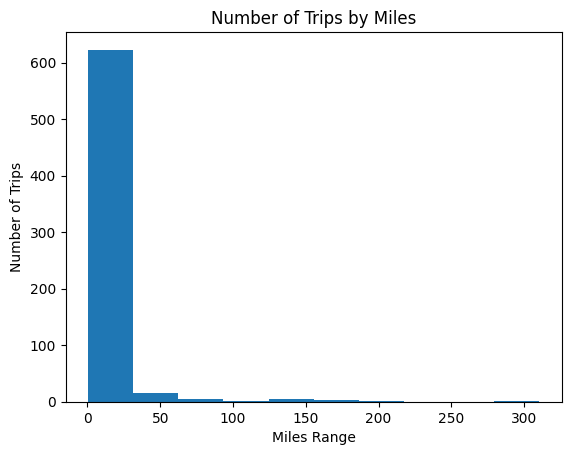

In [12]:
uber_data[ 'MILES' ].plot.hist()

plt.xlabel("Miles Range")
plt.ylabel("Number of Trips")

# setting y_label as price
plt.title("Number of Trips by Miles")
plt.show()

Text(0.5, 1.0, 'Number of trips Vs hours')

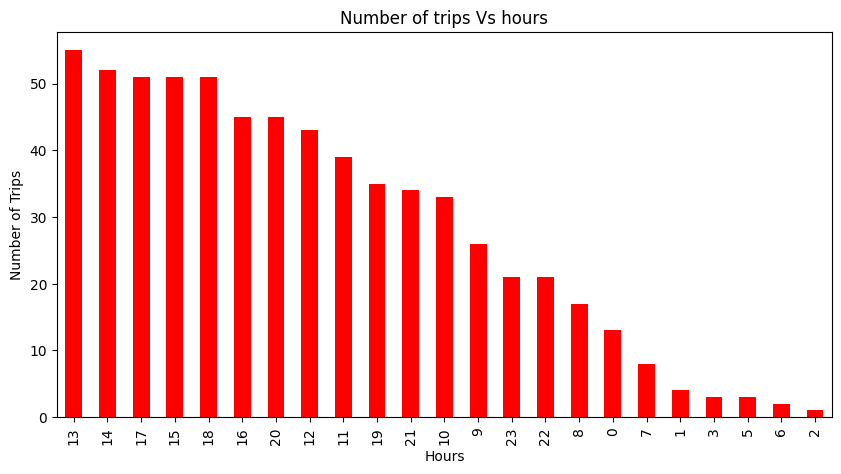

In [13]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind= 'bar', color= 'red', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

Text(0.5, 1.0, 'Number of trips Vs days')

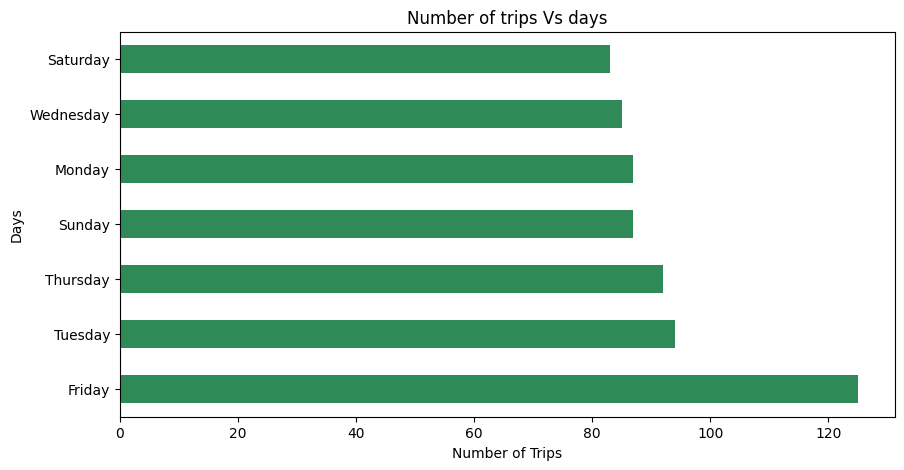

In [14]:
days = uber_data[ 'WEEKDAY' ].value_counts()
days.plot(kind='barh', color= 'seagreen', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

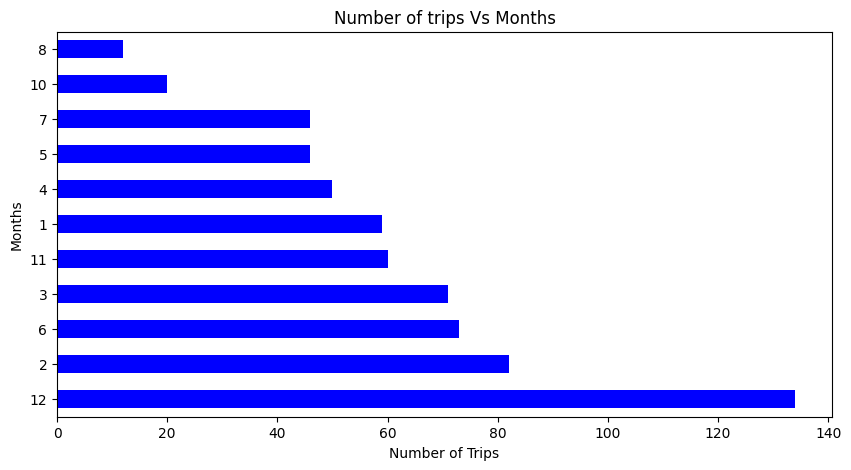

In [15]:
months = uber_data[ 'MONTH' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

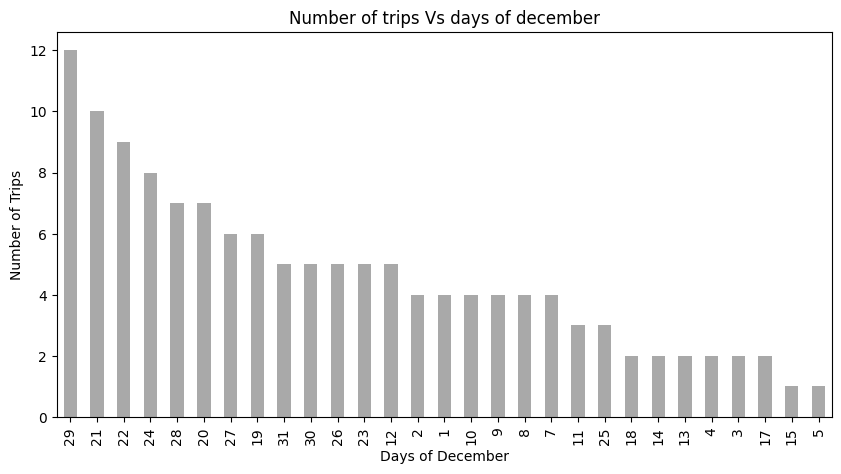

In [16]:
months = uber_data[ 'DAY' ][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

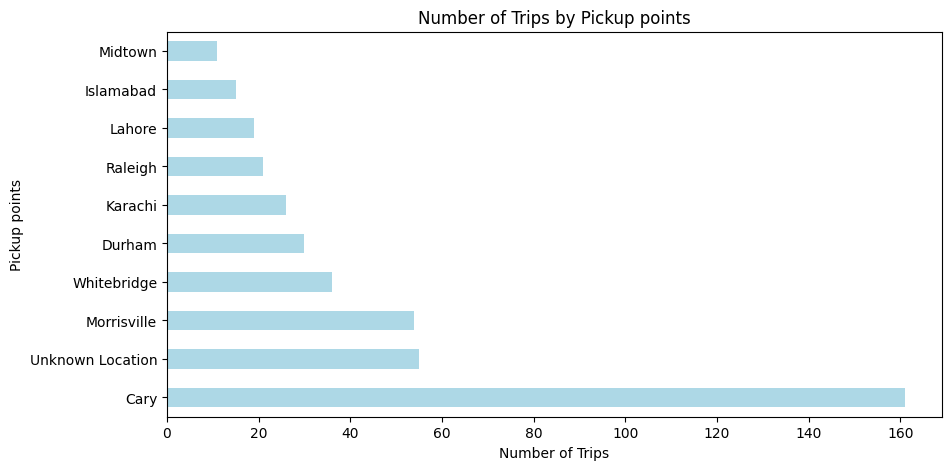

In [17]:
pic_point = uber_data[ 'START' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

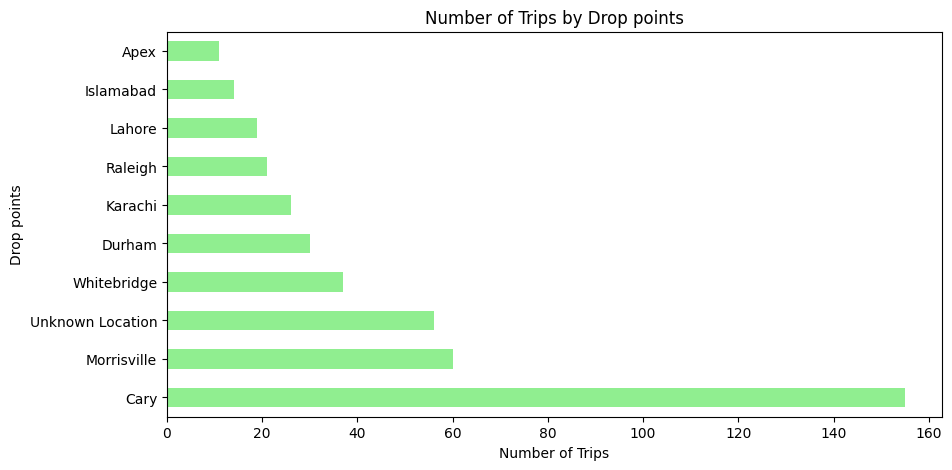

In [18]:
drop_point = uber_data[ 'STOP' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

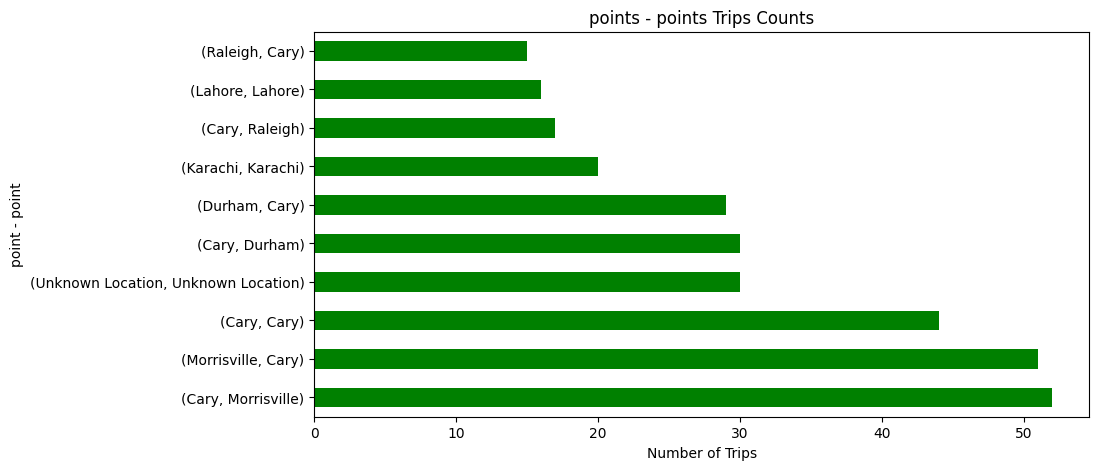

In [19]:
p_p = uber_data[[ 'START', 'STOP'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

In [20]:
print("\n..........Average Length of the Trip..............\n")
print('Business:', round(uber_data[uber_data['CATEGORY'] == 'Business'].MILES.mean(), 3))
print('Personal:', round(uber_data[uber_data['CATEGORY'] == 'Personal'].MILES.mean(), 3))
print('Meal/Entertain:', round(uber_data[uber_data['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 3))


..........Average Length of the Trip..............

Business: 10.97
Personal: 35.583
Meal/Entertain: 5.698
